<a href="https://colab.research.google.com/github/saerarawas/AAI614_rawas/blob/main/Week%205/Notebook5_5_Rawas_Saera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 5.5: Classify this Disease*

<a href="https://colab.research.google.com/github/harmanani/AAI614/blob/main/Week%205/Notebook5.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example I: Diseases Classification

This problem applies machine learning to the field of Medical Science and making the task of Physician easy is the main purpose of this dataset. This dataset has 132 parameters on which 42 different types of diseases can be predicted.

#### Import Libraries

In [84]:
import numpy as np
import pandas as pd

The Dataset consists of 2 CSV files: One of them is training and other is for testing your model.  Each CSV file has 133 columns. 132 of these columns are symptoms that a person experiences and last column is the prognosis.  These symptoms are mapped to 42 diseases you can classify these set of symptoms to.

In [85]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

train=pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%205/Training.csv")
test=pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%205/Testing.csv")

#### Quick EDA

In [86]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [87]:
train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [88]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


#### Drop Unwanted Columns

In [89]:
train=train.drop(["Unnamed: 133"],axis=1)

In [90]:
train.prognosis.value_counts()

,count
prognosis,
Fungal infection,120
Hepatitis C,120
Hepatitis E,120
Alcoholic hepatitis,120
Tuberculosis,120
Common Cold,120
Pneumonia,120
Dimorphic hemmorhoids(piles),120
Heart attack,120


In [91]:
train.isna().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


In [92]:
test.isna().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


#### Split Dataset

In [93]:
P = train[["prognosis"]]
X = train.drop(["prognosis"],axis=1)
Y = test.drop(["prognosis"],axis=1)

In [94]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,P,test_size=0.2,random_state=42)

### Random Forest Classification

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [96]:
rf= RandomForestClassifier(random_state=42)
model_rf = rf.fit(xtrain,ytrain)
tr_pred_rf = model_rf.predict(xtrain)
ts_pred_rf = model_rf.predict(xtest)

print("training accuracy is:",accuracy_score(ytrain,tr_pred_rf))
print("testing accuracy is:",accuracy_score(ytest,ts_pred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


training accuracy is: 1.0
testing accuracy is: 1.0


In [163]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV


svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(xtrain, ytrain.values.ravel())  # Fixes the shape issue



# Evaluate baseline model
train_pred = svm_model.predict(xtrain)
test_pred = svm_model.predict(xtest)
print("Baseline Training Accuracy:", accuracy_score(ytrain, train_pred))
print("Baseline Testing Accuracy:", accuracy_score(ytest, test_pred))
print("\nBaseline Classification Report:\n", classification_report(ytest, test_pred))

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5)
grid.fit(xtrain, ytrain.values.ravel())  # Ensure ytrain is in the correct format


# Best model from grid search
best_model = grid.best_estimator_
optimized_test_pred = best_model.predict(xtest)

# Evaluate optimized model
print("Optimized Testing Accuracy:", accuracy_score(ytest, optimized_test_pred))
print("\nOptimized Classification Report:\n", classification_report(ytest, optimized_test_pred))

# Predict on test dataset
test["predicted"] = best_model.predict(Y)
print(test[["prognosis", "predicted"]])

Baseline Training Accuracy: 1.0
Baseline Testing Accuracy: 1.0

Baseline Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
           

### Predictions

In [97]:
test.join(pd.DataFrame(model_rf.predict(Y),columns=["predicted"]))[["prognosis","predicted"]]

,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


# Example II: Heart Disease Cleveland

### Data Dictionary

A data dictionary describes the data you're dealing with.

Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

| Feature  | Description | Example Values |
|:-----|:-----|:------|
| **age** | Age in years | 29, 45, 60 |
| **sex** | 1 = male; 0 = female | 0, 1  |
| **cp**  | Chest pain type | 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease) |
| **trestbps** | Resting blood pressure (in mm Hg on admission to the hospital)  | 120, 140, 150 |
| **chol** | Serum cholesterol in mg/dl | 180, 220, 250 |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) | 0, 1 |
| **restecg** | Resting electrocardiographic results | 0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy  |
| **thalach** | Maximum heart rate achieved | 160, 180, 190 |
| **exang**  | Exercise induced angina (1 = yes; 0 = no) | 0, 1 |
| **oldpeak**  | ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest | 0.5, 1.0, 2.0  |
| **slope** | The slope of the peak exercise ST segment | 0: Upsloping, 1: Flatsloping, 2: Downsloping |
| **ca** | Number of major vessels (0-3) colored by fluoroscopy | 0, 1, 2, 3 |
| **thal** | Thalium stress result  | 1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect |
| **target** | Have disease or not (1 = yes; 0 = no) | 0, 1 |

> **Note:** No personal identifiable information (PPI) can be found in the dataset.

In [98]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy

import pandas as pd # pandas is so commonly used, it's shortened to pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns # seaborn gets shortened to sns, TK - can seaborn be removed for matplotlib (simpler)?

## Models
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" (see below)
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+

# Print last updated
import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")

# Print versions of libraries we're using (as long as yours are equal or greater than these, your code should work)
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Notebook last updated: 2024-11-30 07:53:40.303966

NumPy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.8.0
Scikit-Learn version: 1.5.2


In [99]:
df = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%205/heart-disease.csv")
df.shape

(303, 14)

## EDA Analysis

In [100]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [101]:
df.target.value_counts()

,count
target,
1,165
0,138


In [102]:
df.target.value_counts(normalize=True)

,proportion
target,
1,0.544554
0,0.455446


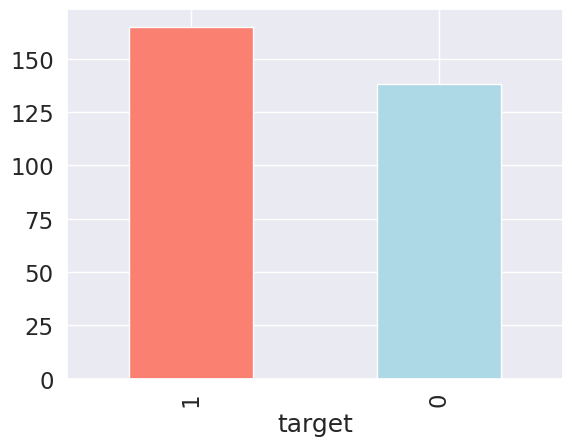

In [103]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [105]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Let us compare two columns using the function [`pd.crosstab(index, columns)`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html).

This is helpful if you want to start gaining an intuition about how your independent variables interact with your dependent variables.  Let's compare our target column with the sex column.  
Remember from our data dictionary, for the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.

In [106]:
df.sex.value_counts()

,count
sex,
1,207
0,96


In [107]:
# Compare target column with sex column
pd.crosstab(index=df.target, columns=df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Since there are about 100 women and 72 of them have a positive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a ~72% (72/96 women in our dataset are positive for heart disease) chance she has heart disease.

As for males, there's about 200 total with around half (93/207) indicating a presence of heart disease.
So we might predict, if the participant is male, 50% of the time he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.

This can be our very simple **baseline**, we'll try to beat it with machine learning.

Let us now visualize our data.  We can plot our `pd.crosstab` comparison by calling the `plot()` method and passing it a few parameters:

* `kind`- The type of plot you want (e.g. `"bar"` for a bar plot).
* `figsize=(length, width)` - How big you want it to be.
* `color=[colour_1, colour_2]` - The different colours you'd like to use.

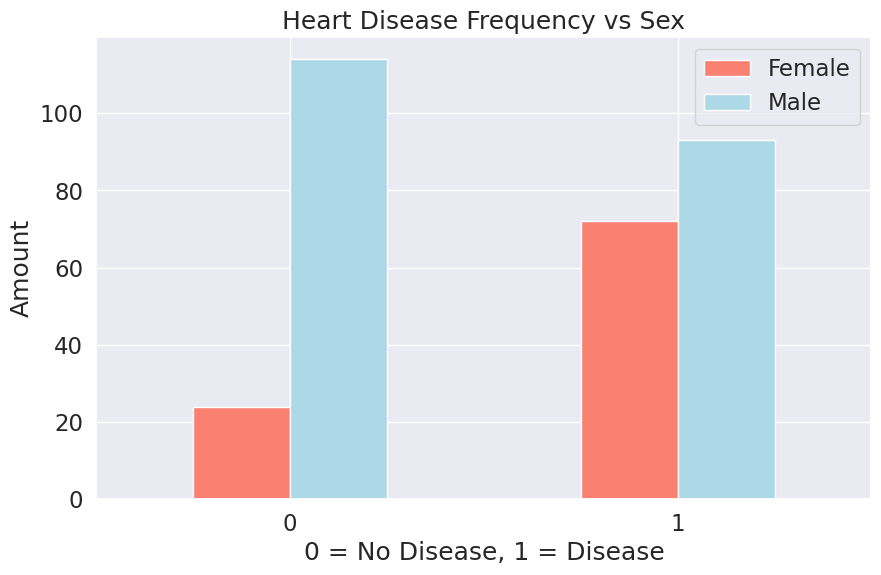

In [108]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

### Comparing age and maximum heart rate

Let's try combining a couple of independent variables, such as, `age` and `thalach` (maximum heart rate) and then comparing them to our target variable `heart disease`.

Because there are so many different values for `age` and `thalach`, we'll use a scatter plot.

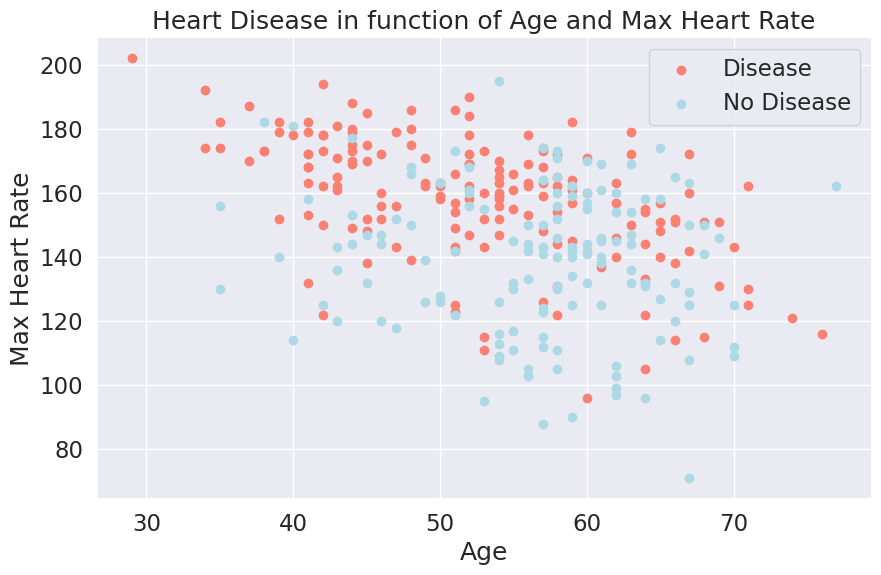

In [109]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

What can we infer from this?

It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and it seems there may be more heart disease in the younger population too (more orange dots).

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.

Let's check the age **distribution**.

> **Note:** Distribution can considered as the *spread* of data. As in, when viewed as a whole, what different values appear in the data?

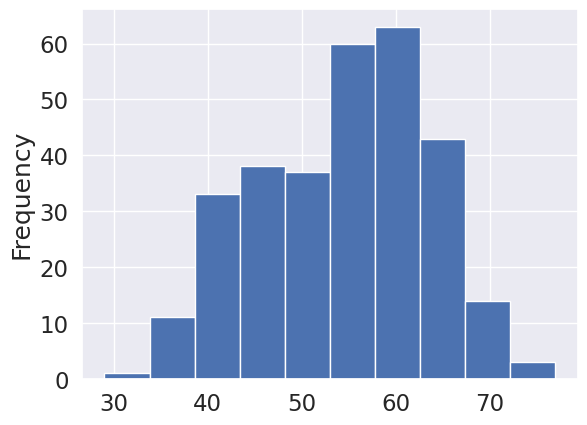

In [110]:
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist();

We can see it's a [**normal distribution**](https://en.wikipedia.org/wiki/Normal_distribution) but slightly swaying to the right, which reflects in the scatter plot above.

### Comparing heart disease frequency and chest pain type

Let's try comparing another independent variable with our target variable.

This time, we'll use `cp` (chest pain) as the independent variable.

We'll use the same process as we did before with `sex`.

In [111]:
pd.crosstab(index=df.cp, columns=df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


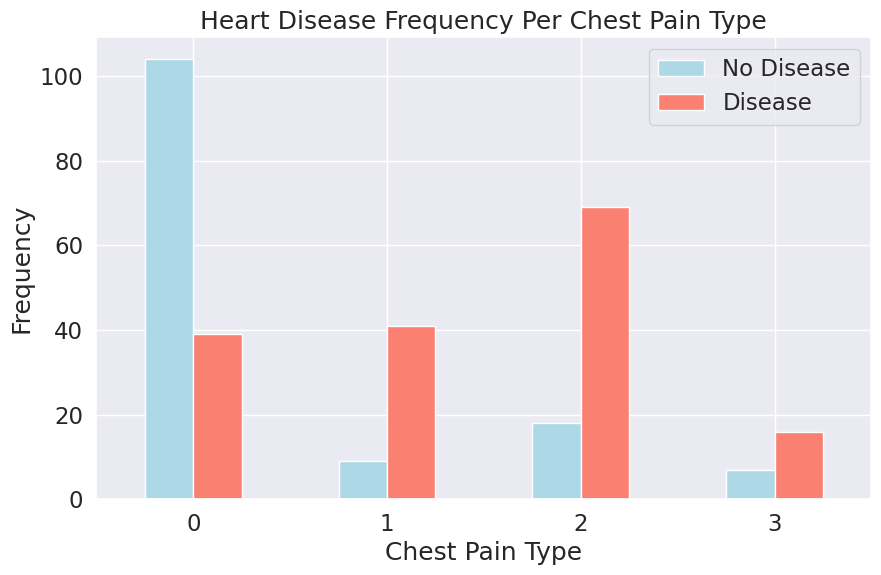

In [112]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

What can we infer from this?

Remember from our data dictionary what the different levels of chest pain are.

| Feature  | Description | Example Values |
|:-----|:-----|:------|
| **cp**  | Chest pain type | 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease) |
    
It's interesting that atypical angina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

Wait...?

What does *atypical agina* even mean?

At this point, it's important to remember, if your data dictionary doesn't supply you enough information, you may want to do further research on your values.

This research may come in the form of asking a **subject matter expert** (such as a cardiologist or the person who gave you the data) or Googling to find out more.

According to PubMed, it seems [even some medical professionals are confused by the term](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2763472/).

> Today, 23 years later, “atypical chest pain” is still popular in medical circles. Its meaning, however, remains unclear. A few articles have the term in their title, but do not define or discuss it in their text. In other articles, the term refers to noncardiac causes of chest pain.

Although not conclusive, the plot above is a sign there may be a confusion of defintions being represented in data.

## Correlation between independent variables

Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using [`pd.DataFrame.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) which will create a [**correlation matrix**](https://en.wikipedia.org/wiki/Correlation#Correlation_matrices) for us, in other words, a big table of numbers telling us how related each variable is the other.

In [113]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Following the data explorer's motto of *visualize, visualize, visualize!*, let's plot this matrix.

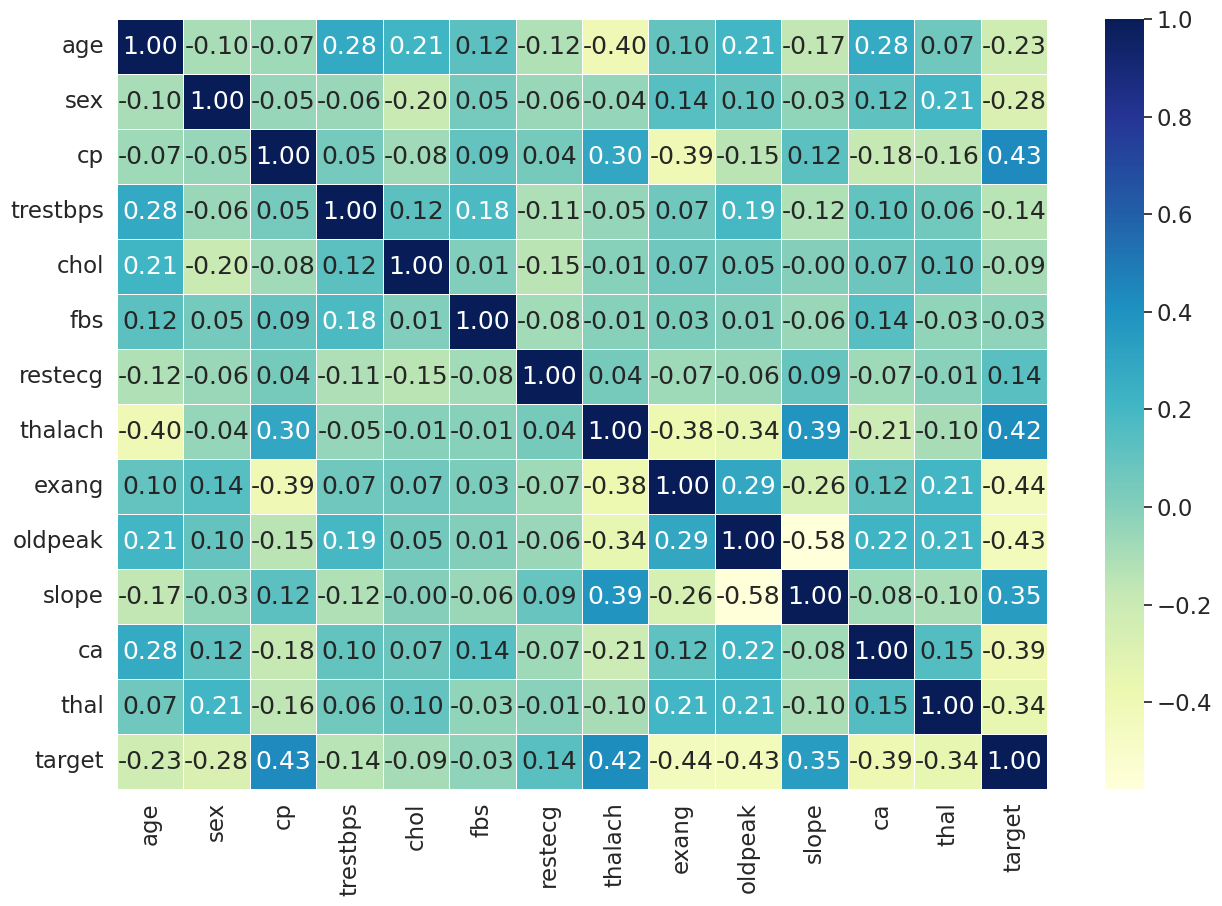

In [114]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

Much better. A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

### Notes

* Not every EDA will look the same, what we've seen here is an example of what you could do for structured, tabular dataset.
* You don't necessarily have to do the same plots as we've done here, there are many more ways to visualize data, I encourage you to look at more.
* Quite often, we'll want to find:
    * **Distributions** - What's the spread of the data? We can do this with [`pd.DataFrame.hist(column="target_column")`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html).
    * **Missing values** - Is our data missing anything? Why might this be the case and will this affect us going forward? We can do this with [`pd.DataFrame.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) or [`pd.isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html).
    * **Outliers** - Are there any samples that lay quite far outside the rest of our data's distributions? How might these affect the data going forward?

With this being said, let's build some models!

## Build Our Models

We've explored the data, now we'll try to build a machine learning model to be able to predict our target variable based on the 13 independent variables.

Our problem?

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

That's what we'll be trying to answer.

Our evaluation metric?

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

Let's look at it again.

In [115]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We're trying to predict our target variable using all of the other variables.

To do this, we'll split the target variable from the rest.

We can do this by creating:

* `X` - Our features (all variables except the `target` column) using [`pd.DataFrame.drop(labels="target")`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).
* `y` - Our target variable using [`df.target.to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) (this will extract the `target` column as a NumPy array).

In [116]:
# Everything except target variable
X = df.drop(labels="target", axis=1)

# Target variable
y = df.target.to_numpy()

Let's see our new variables.

In [117]:
# Independent variables (no target column)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [118]:
# Targets (in the form of a NumPy array)
y, type(y)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Split the data into two parts.  The `test_size` parameter is used to tell the `train_test_split()` function how much of our data we want in the test set.

For our problem, a train and test set are enough. But for other problems, you could also use a validation (train/validation/test) set or cross-validation (we'll see this later on).

In [119]:
# Random seed for reproducibility (since train_test_split is random by default, setting the seed will create reproducible splits)
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

Let's look at our training data.

In [120]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [121]:
y_train, len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]),
 242)

Beautiful, we can see we're using 242 samples to train on.

Let's look at our test data.

In [122]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [123]:
y_test, len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]),
 61)

And we've got 61 examples we'll test our model(s) on.

Let's build some.

### Choosing a model

Let us start the following models:

1. Logistic Regression - [`sklearn.linear_model.LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`sklearn.neighbors.KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`sklearn.ensemble.RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

#### Why these?

If we look at the [Scikit-Learn algorithm machine learning model map](https://scikit-learn.org/stable/machine_learning_map.html), we can see we're working on a classification problem and these are the algorithms it suggests (plus a few more).

| <img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/sklearn-ml-map-cheatsheet-heart-disease-ensemble.png?raw=1" alt="an example classification path using the Scikit-Learn machine learning model map" width=500/> |
|:--:|
| An example path we can take using the Scikit-Learn Machine Learning Map |

> "Wait, I don't see Logistic Regression and why not use LinearSVC?"

Good questions.

I was confused too when I didn't see Logistic Regression listed as well because when you read the Scikit-Learn documentation on it, you can see it's [a model for classification](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

And as for [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html), let's pretend we've tried it (you can try it for yourself if you like), and it doesn't work, so we're following other options in the map.

For now, knowing each of these algorithms inside and out is not essential (however, this would be a fantastic extension to this project).

Machine learning and data science is an iterative practice.

These algorithms are tools in your toolbox.

In the beginning, on your way to becoming a practitioner, it's more important to understand your problem (such as, classification versus regression) and what tools you can use to solve it.

Since our dataset is relatively small, we can run some quick experiments to see which algorithm performs best and iteratively try to improve it.

Many of the algorithms in the Scikit-Learn library have similar APIs (Application Programming Interfaces).

For example, for training a model you can use [`model.fit(X_train, y_train)`](https://scikit-learn.org/stable/glossary.html#term-fit).

And for scoring a model [`model.score(X_test, y_test)`](https://scikit-learn.org/stable/glossary.html#term-score) (scoring a model compares predictions to the ground truth labels).

For classification models, calling `score()` usually defaults to returning the ratio (accuracy) of correct predictions (1.0 = 100% correct).

Since the algorithms we've chosen implement the same methods for fitting them to the data as well as evaluating them, let's put them in a dictionary and create a which fits and scores them.

In [124]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=100), # Note: if you see a warning about "convergence not reached", you can increase `max_iter` until convergence is reached
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

Function built!

Now let's see how our collection of models go on our data.

In [125]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

It looks like each of our models was able to fit our data without any errors.

How about we compare them visually?

### Comparing the results of several models

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

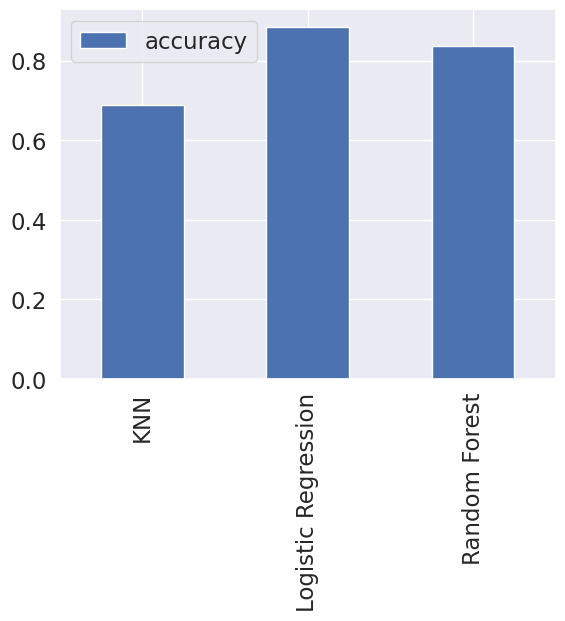

In [126]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

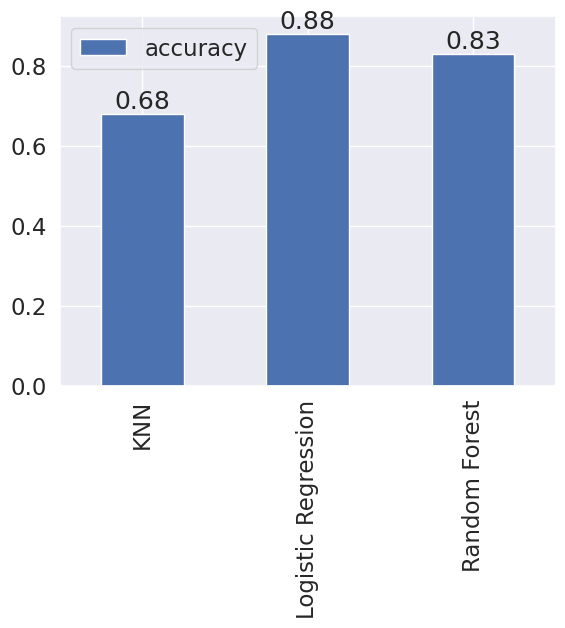

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
model_scores = {
    'KNN': [0.68],
    'Logistic Regression': [0.88],
    'Random Forest': [0.83]
}

# Create a DataFrame
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

# Plot the bar chart
ax = model_compare.T.plot.bar()

# Add the value labels on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# Display the plot
plt.show()


From the plot it looks like the [`sklearn.linear_model.LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model performs best.

Now... since we've found the best model.

Let's take it to the boss and show her what we've found!

## Taking our best model to the boss


| **Term** | **Definition** |
| :----- | :----- |
| [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). |
| [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) | Splits your dataset into multiple versions of training and test sets and trains/evaluations your model on each different version. This ensures that your evaluation metrics are across several different splits of data rather than a single split (if it was only a single split, you might get lucky and get better than usual results, the same for the reverse, if you get a poor split, you might find your metrics lower than they should be). |
| [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) | A common classification evaluation metric. Measures the proportion of true positives over total number of samples. Higher precision leads to fewer false positives. |  
[**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) | A common classification evaluation metric. Measures the proportion of true positives over total number of true positives and false negatives. Higher recall leads to fewer false negatives. |
| [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) | Combines precision and recall into one metric. 1 is best, 0 is worst. |
| [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) | Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score. |
| [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) | [Receiver Operating Characterisitc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate. A perfect curve will follow the left and top border of a plot. |
| [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) | The area underneath the ROC curve. A perfect model achieves a score of 1.0. |

### 6.1 Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

There are several hyperparameters we can tune for the K-Nearest Neighbors (KNN) algorithm (or [`sklearn.neighbors.KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

But for now, let's start with one, the number of neighbors.

The default is 5 (`n_neigbors=5`).

What are neighbours?

Well, imagine all our different samples on one graph like the scatter graph several cells above.

KNN works by assuming dots which are closer together belong to the same class.

If `n_neighbors=5` then it assume a dot with the 5 closest dots around it are in the same class.

We've left out some details here like what defines close or how distance is calculated but I encourage you to research them by going through the documentation.

For now, let's try a few different values of `n_neighbors` and test how the results go.

In [128]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

That was quick!

Now let's look at KNN's train scores.

In [129]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Ok, these are a bit hard to understand, so let's follow the data explorer's motto and *visualize, visualize, visualize!* In other words, let's plot them.

Maximum KNN score on the test data: 75.41%


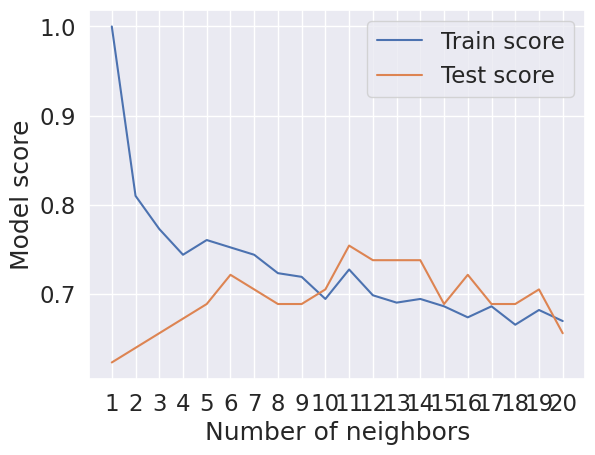

In [130]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, `n_neighbors = 11` seems best.

Even knowing this, the `KNN`'s model performance didn't get near what `LogisticRegression` or the `RandomForestClassifier` did.

Because of this, we'll discard `KNN` and focus on the other two.

We've tuned `KNN` by hand but let's see how we can `LogisticsRegression` and `RandomForestClassifier` using [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

Instead of us having to manually try different hyperparameters by hand, `RandomizedSearchCV` tries a number of different combinations, evaluates them and saves the best.

### Tuning models with with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Reading the Scikit-Learn documentation for [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV), we find there's a number of different hyperparameters we can tune.

The same for [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

> **Note:** Be careful creating a hyperparameter dictionary for tuning as if there are typos in the keys of the dictionary, you will find that your code hyperparameter tuning code will produce errors.

In [131]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now let's use [`sklearn.model_selection.RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) to try and tune our `LogisticRegression` model.

We'll pass it the different hyperparameters from `log_reg_grid` as well as set `n_iter=20`. This means, `RandomizedSearchCV` will try 20 different combinations of hyperparameters from `log_reg_grid` and save the best ones.

In [133]:
%%time

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=50,
                                verbose=2,
                                random_state=42,
                                )

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=21.54434690031882, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=21.54434690031882, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=21.54434690031882, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=21.54434690031882, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=21.54434690031882, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1291.5496650148827, max_iter=300, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1291.5496650148827, max_iter=300, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1291.5496650148827, max_iter=300, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1291.5496650148827, max_iter=300, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1291.5496650148827, max_iter=300, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=2.782559402207126, max_iter=100,

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=21.54434690031882, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.000774263682681127, max_iter=200, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.000774263682681127, max_iter=200, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.000774263682681127, max_iter=200, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=21.54434690031882, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=21.54434690031882, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=21.54434690031882, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=21.54434690031882, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=21.54434690031882, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=200, penalty=l2, solv

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END C=166.81005372000558, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=10000.0, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=10000.0, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=10000.0, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=10000.0, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=10000.0, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=100, penalty=l2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END C=0.046415888336127774, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.046415888336127774, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.046415888336127774, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.046415888336127774, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.046415888336127774, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1291.5496650148827, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1291.5496650148827, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1291.5496650148827, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1291.5496650148827, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1291.5496650148827, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1291.5496650148827, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.046415888336127774, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.046415888336127774, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.046415888336127774, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.046415888336127774, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.046415888336127774, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.000774263682681127, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.000774263682681127, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.000774263682681127, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.000774263682681127, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.000774263682681127, max_iter=200, penalty=l2, solver=l

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

[CV] END ..C=10000.0, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=10000.0, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=10000.0, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=300, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, max_iter=300, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, max_iter=300, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, max_iter=300, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, max_iter=300, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=2.782559402207126, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=2.782559402207126, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=2.782559402207126, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=2.782559402207126, max_iter=100, pen

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END C=2.782559402207126, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=2.782559402207126, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=2.782559402207126, max_iter=200, penalty=l2, solver=saga; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.000774263682681127, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.000774263682681127, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.000774263682681127, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.000774263682681127, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.000774263682681127, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....C=0.0001, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....C=0.0001, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....C=0.0001, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....C=0.0001, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....C=0.0001, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=100, penalty=none

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.046415888336127774, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.046415888336127774, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.046415888336127774, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.000774263682681127, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.000774263682681127, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.000774263682681127, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.000774263682681127, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.000774263682681127, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.005994842503189409, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.005994842503189409, max_iter=200, penalty=l

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

[CV] END C=10000.0, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.005994842503189409, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.005994842503189409, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.005994842503189409, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.005994842503189409, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.005994842503189409, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.005994842503189409, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.005994842503189409, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.005994842503189409, max_iter=200, penalty=none, solver=liblinear; to

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

[CV] END C=166.81005372000558, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.046415888336127774, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.046415888336127774, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END C=0.046415888336127774, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.046415888336127774, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.046415888336127774, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END C=166.81005372000558, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=166.81005372000558, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000558, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.1s
CPU times: user 2.72 s, sys: 90.1 ms, total: 2.81 s
Wall time: 2.82 s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
140 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Trac

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l2', 'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, verbose=2)

In [134]:
rs_log_reg.best_params_

{'solver': 'liblinear',
 'penalty': 'l2',
 'max_iter': 100,
 'C': 2.782559402207126}

In [135]:
rs_log_reg.score(X_test, y_test)

0.8688524590163934

Nice! That seems on par with the result we got before *without* any hyperparameter tuning.

> **Note:** Many of the algorithms in Scikit-Learn have pretty good default hyperparameter values so don't be surprised if they perform pretty good on your data straight out of the box. But don't take this as being true all the time. Just because the default hyperparameters perform pretty well on your data doesn't mean there aren't a better set of hyperparameter values out there.

Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`.

In [136]:
%%time

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CPU times: user 1min 22s, sys: 503 ms, total: 1min 23s
Wall time: 1min 26s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [137]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [138]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8688524590163934

Excellent! Tuning the hyperparameters for each model saw a slight performance boost in both the `RandomForestClassifier` and `LogisticRegression`.

This is akin to tuning the settings on your oven and getting it to cook your favourite dish just right.

But since `LogisticRegression` is pulling out in front, we'll try tuning it further with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

## Tuning a model with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

The difference between `RandomizedSearchCV` and `GridSearchCV` is:

* [`sklearn.model_selection.RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) searches over a grid of hyperparameters performing `n_iter` combinations (e.g. will explore random combinations of the hyperparameters for a defined number of iterations).
* [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) will test every single possible combination of hyperparameters in the grid (this is a thorough test but can take quite a long time).

Each class will save the best model at the end of testing.

Let's see it in action.

In [139]:
%%time

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 523 ms, sys: 6.04 ms, total: 529 ms
Wall time: 527 ms


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [140]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [141]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations.

> **Note:** If there are a large number of hyperparameter combinations in your grid, `GridSearchCV` may take a long time to try them all out. This is why it's a good idea to start with `RandomizedSearchCV`, try a certain amount of combinations and then use `GridSearchCV` to refine them.

## Evaluating the classification model, beyond accuracy


| Metric/Evaluation Technique | Scikit-Learn method/documentation |
| ----- | ----- |
| ROC curve and AUC score | [`sklearn.metrics.RocCurveDisplay()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html), **Note:** This was previously `sklearn.metrics.plot_roc_curve()`, as of Scikit-Learn version 1.2+, it is `sklearn.metrics.RocCurveDisplay()`. |
| Confusion matrix | [`sklearn.metrics.confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) |
| Classification report | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |
| Precision | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) |
| Recall | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) |
| F1-score | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |

In [142]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

Let's see them.

In [143]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

They look like our original test data labels, except different where the model has predicred wrong.

In [144]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

Since we've got our prediction values we can find the metrics we want.

Let's start with the ROC curve and AUC scores.

## ROC Curve and AUC Scores

Recall that the ROC curve is a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

In our case...

> To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

Scikit-Learn implements a function `RocCurveDisplay` (previously called `plot_roc_curve` in Scikit-Learn versions < 1.2) which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

Reading the documentation on the [`RocCurveDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) function we can see it has a class method called [`from_estimator(estimator, X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_estimator) as inputs.

Where `estimator` is a fitted machine learning model and `X` and `y` are the data you'd like to test it on.

In our case, we'll use the GridSearchCV version of our `LogisticRegression` estimator, `gs_log_reg` as well as the test data, `X_test` and `y_test`.

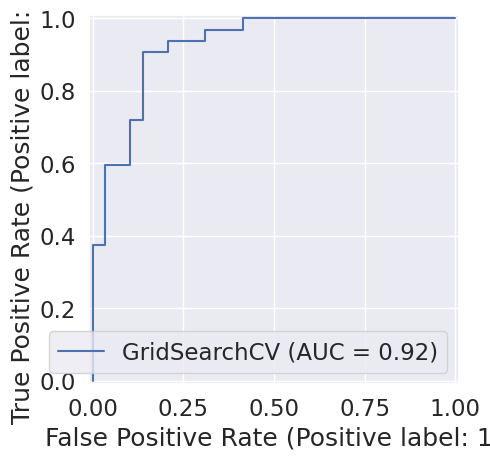

In [145]:
# Before Scikit-Learn 1.2.0 (will error with versions 1.2+)
# from sklearn.metrics import plot_roc_curve
# plot_roc_curve(gs_log_reg, X_test, y_test);

# Scikit-Learn 1.2.0 or later
from sklearn.metrics import RocCurveDisplay

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                               X=X_test,
                               y=y_test);

This is great, our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5.

But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

Let's move on to the next evaluation request, a confusion matrix.

## Creating a confusion matrix

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using [`sklearn.metrics.confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and passing it the true labels and predicted labels.

In [146]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


As you can see, Scikit-Learn's built-in confusion matrix is a bit bland. For a presentation you'd probably want to make it visual.

Let's create a function which uses Seaborn's [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) for doing so.

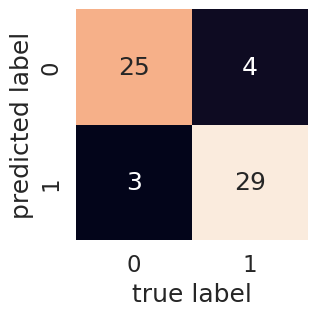

In [147]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

Beautiful! That looks much better.

You can see the model gets confused (predicts the wrong label) relatively the same across both classes.

In essence, there are 4 occasaions where the model predicted 0 when it should've been 1 (false negative) and 3 occasions where the model predicted 1 instead of 0 (false positive).

As further evaluation, we could look into these samples and see why this may be the case.

## Classification report

A classification report is a collection of different metrics and other details.

We can make a classification report using [`sklearn.metrics.classification_report(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and passing it the true labels as well as our models predicted labels.

A classification report will also give us information on the precision and recall of our model for each class.

In [148]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



What's going on here?

Let's refresh ourselves on of the above metrics.

| **Metric/metadata** | **Explanation** |
| ----- | ----- |
| **Precision** | Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0. |
| **Recall** | Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0. |
| **F1 score** | A combination of precision and recall. A perfect model achieves an F1 score of 1.0. |
| **Support** | The number of samples each metric was calculated on. |
| **Accuracy** | The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0. |
| **Macro avg** | Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric. |
| **Weighted avg** | Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples). |

Ok, now we've got a few deeper insights on our model.

But these were all calculated using a single training and test set.

What we'll do to make them more solid is calculate them using cross-validation.

How?

We'll take the best model along with the best hyperparameters and use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) along with various `scoring` parameter values.

`cross_val_score()` works by taking an estimator (machine learning model) along with data and labels.

It then evaluates the machine learning model on the data and labels using cross-validation across `cv=5` (the default number of splits) splits and a defined `scoring` parameter.

Let's remind ourselves of the best hyperparameters and then see them in action.

In [149]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [150]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

Now we've got an instantiated classifier, let's find some cross-validated metrics.

In [151]:
%%time

# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy") # accuracy as scoring
cv_acc

CPU times: user 44.2 ms, sys: 0 ns, total: 44.2 ms
Wall time: 48.6 ms


array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

The output from `cross_val_score()` shows 5 different metrics across different splits of the data.

This goes to show the power of cross-validation.

If we had have only chosen to go with the results of one data split, we might be thinking our model is under performing or over performing.

Since there are 5 metrics here, we'll take the average.

In [152]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

Now we'll do the same for other classification metrics.

In [153]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [154]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [155]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

Okay, we've got cross validated metrics, now what?

Let's visualize them.

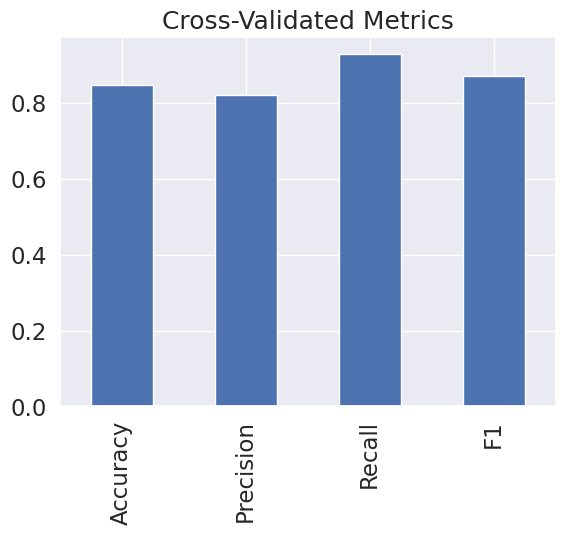

In [156]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

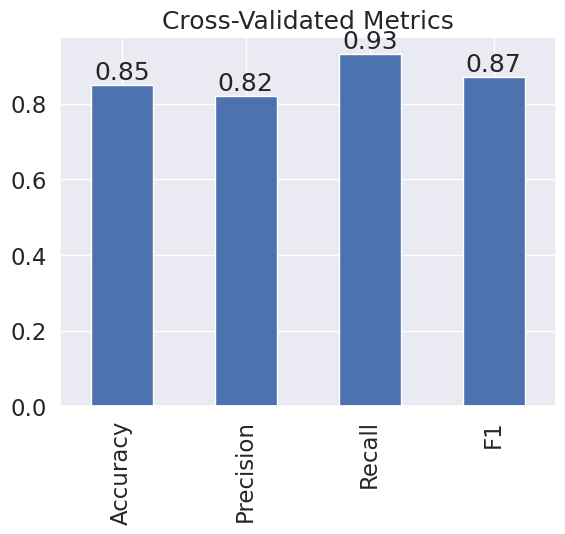

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming cv_acc, cv_precision, cv_recall, and cv_f1 are defined
cv_acc = [0.85]
cv_precision = [0.82]
cv_recall = [0.93]
cv_f1 = [0.87]

# Creating the DataFrame
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1
}, index=[0])

# Transpose the DataFrame for plotting
ax = cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False)

# Adding value labels on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Display the plot
plt.show()


Great! This looks like something we could share. An extension might be adding the metrics on top of each bar so someone can quickly tell what they were.

What now?

The final thing to check off the list of our model evaluation techniques is feature importance.

## Feature importance

Feature importance is another way of asking, "Which features contribute most to the outcomes of the model?"

For our problem, trying to predict heart disease using a patient's medical characteristics, getting the feature importance is like asking "Which characteristics contribute most to a model predicting whether someone has heart disease or not?"

Because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well.

This means for each model, there's a slightly different way of finding which features were most important and in turn, the feature importance of one model won't necessarily reflect the feature importance of another.

You can usually find an example via the Scikit-Learn documentation or via searching for something like "MODEL TYPE feature importance", such as, "random forest feature importance".

Since we're using `LogisticRegression`, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the `coef_` attribute. Looking at the [Scikit-Learn documentation for `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), the `coef_` attribute is the coefficient of the features in the decision function.

We can access the `coef_` attribute after we've fit an instance of `LogisticRegression`.

In [157]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [158]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

Looking at this it might not make much sense. But these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.

Even knowing this, in it's current form, this `coef_` array still doesn't mean much. But it will if we combine it with the columns (features) of our dataframe.

In [159]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

Now we've match the feature coefficients to different features, let's visualize them.

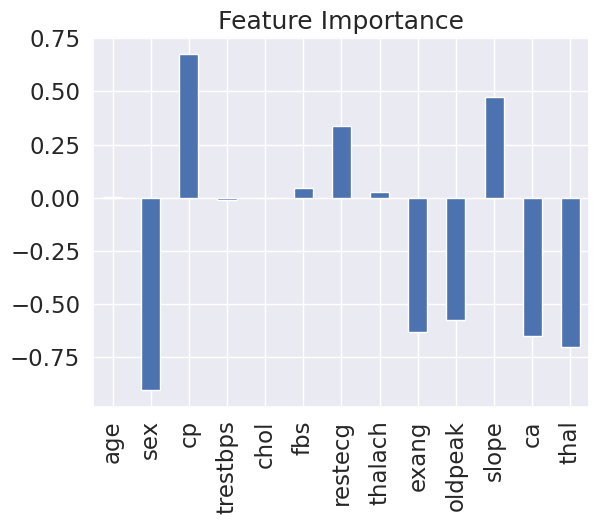

In [160]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the `sex` attribute has a negative value of -0.904, which means as the value for `sex` increases, the `target` value decreases.

We can see this by comparing the `sex` column to the `target` column.

In [161]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


You can see, when `sex` is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (`target` = 1) than without.

And then as `sex` increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

How about a positive correlation?

In [162]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Looking back the data dictionary, we see `slope` is the "slope of the peak exercise ST segment" where:
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
    
According to the model, there's a positive correlation of 0.470, not as strong as `sex` and `target` but still more than 0.

This positive correlation means our model is picking up the pattern that as `slope` increases, so does the `target` value.

Is this true?

When you look at the contrast (`pd.crosstab(df["slope"], df["target"]`) it is. As `slope` goes up, so does `target`.

What can you do with this information?

This is something you might want to talk to a subject matter expert about.

They may be interested in seeing where machine learning model is finding the most patterns (highest correlation) as well as where it's not (lowest correlation).

Doing this has a few benefits:
1. **Finding out more** - If some of the correlations and feature importances are confusing, a subject matter expert may be able to shed some light on the situation and help you figure out more.
2. **Redirecting efforts** - If some features offer far more value than others, this may change how you collect data for different problems. See point 3.
3. **Less but better** - Similar to above, if some features are offering far more value than others, you could reduce the number of features your model tries to find patterns in as well as improve the ones which offer the most. This could potentially lead to saving on computation, by having a model find patterns across less features, whilst still achieving the same performance levels.

## Experimentation

We've completed all the metrics!

You should be able to put together a great report containing a confusion matrix, and a handful of cross-validated metrics such as precision, recall and F1-score and you can even include which features contribute most to the model making a decision.

But after all this you might be wondering where step 6 in the framework is, experimentation.

Well the secret here is, as you might've guessed, the whole thing is experimentation.

From trying different models, to tuning different models to figuring out which hyperparameters were best.

What we've worked through so far has been a series of experiments.

And the truth is, we could keep going. But of course, things can't go on forever.

So by this stage, after trying a few different things, we'd ask ourselves did we meet the evaluation metric?

Remember we defined one in step 3.

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue this project.

In this case, we didn't.

The highest accuracy our model achieved was below 90%.